In [251]:
# Using data from Baseball Savant, I was trying to see if there is any corrolation between the average spin rate on an MLB pitcher's
# four-seam fastball and a pitcher's swing and miss rate (whiff%). My hypothesis is yes; the more you can spin your fastball, the more
# swing and miss you will generate. 

In [252]:
pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [253]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [254]:
# Uploaded both csv files from Baseball Savant, one containing a pitcher's whiff% on their four-seam fastball
# and the other containing the average spin rate on their four-seam fastball

In [255]:
df_whiff = pd.read_csv('pitch-arsenal-stats.csv')
df_spinrate = pd.read_csv('pitch_arsenals.csv')

df_whiff.head()

,last_name,first_name,player_id,team_name_alt,pitch_type,pitch_name,run_value_per_100,run_value,pitches,pitch_usage,...,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
0,Rodón,Carlos,607074,SF,FF,4-Seamer,1.2,22,1826,61.2,...,0.213,0.358,0.290,27.9,30.5,24.1,0.206,0.347,0.278,44.8
1,Gilbert,Logan,669302,SEA,FF,4-Seamer,0.7,12,1626,53.9,...,0.259,0.439,0.337,23.7,22.5,20.5,0.261,0.444,0.339,50.5
2,McKenzie,Triston,663474,CLE,FF,4-Seamer,1.1,17,1575,56.1,...,0.202,0.357,0.289,19.6,18.4,17.4,0.241,0.450,0.336,46.9
3,Cole,Gerrit,543037,NYY,FF,4-Seamer,0.5,8,1698,51.9,...,0.221,0.420,0.313,28.9,33.8,24.8,0.216,0.398,0.300,47.6
4,Pivetta,Nick,601713,BOS,FF,4-Seamer,0.6,9,1572,51.0,...,0.236,0.442,0.341,21.1,21.6,19.8,0.249,0.466,0.357,48.8


In [256]:
# These files contained more data then I wanted to look at so I had to filter them out and focus jsut of whiff% and avg spin rate

In [257]:
columns_to_drop = list(range(2,5)) + list(range(6,14)) + list(range(15,21))

In [258]:
df_whiff.drop(df_whiff.columns[columns_to_drop], axis=1, inplace=True)

In [259]:
df_whiff.head()

,last_name,first_name,pitch_name,whiff_percent
0,Rodón,Carlos,4-Seamer,27.9
1,Gilbert,Logan,4-Seamer,23.7
2,McKenzie,Triston,4-Seamer,19.6
3,Cole,Gerrit,4-Seamer,28.9
4,Pivetta,Nick,4-Seamer,21.1


In [260]:
df_spinrate.head()

,last_name,first_name,pitcher,ff_avg_spin,si_avg_spin,fc_avg_spin,sl_avg_spin,ch_avg_spin,cu_avg_spin,fs_avg_spin,kn_avg_spin,st_avg_spin,sv_avg_spin
0,Cole,Gerrit,543037,2424.0,NaN,2526.0,2551.0,1579.0,2790.0,NaN,NaN,NaN,NaN
1,Keller,Mitch,656605,2378.0,2377.0,2460.0,NaN,1648.0,2602.0,NaN,NaN,2766.0,NaN
2,Cease,Dylan,656302,2512.0,NaN,NaN,2793.0,1696.0,2634.0,NaN,NaN,NaN,NaN
3,Lynn,Lance,458681,2430.0,2261.0,2584.0,2460.0,1814.0,2507.0,NaN,NaN,2510.0,NaN
4,Webb,Logan,657277,1988.0,1876.0,NaN,2557.0,1489.0,NaN,NaN,NaN,NaN,NaN


In [261]:
columns_to_drop2 = list(range(4,13))
df_spinrate.drop(df_spinrate.columns[columns_to_drop2], axis=1, inplace=True)

In [262]:
df_spinrate.drop(df_spinrate.columns[[2]], axis = 1, inplace = True)

In [263]:
df_spinrate.head()

,last_name,first_name,ff_avg_spin
0,Cole,Gerrit,2424.0
1,Keller,Mitch,2378.0
2,Cease,Dylan,2512.0
3,Lynn,Lance,2430.0
4,Webb,Logan,1988.0


In [264]:
df_spinrate.to_csv('df_spinrate.csv', index = False)

In [265]:
df_whiff.to_csv('df_whiff.csv', index = False)

In [266]:
# After turing each filtered dataframe back into .csv files, I merged them together keeping the first and last name
# of the pitchers to match their individual stats up

In [267]:
merged_df = pd.merge(df_whiff[[' first_name', 'last_name', 'pitch_name', 'whiff_percent']], 
                     df_spinrate[[' first_name', 'last_name', 'ff_avg_spin']], 
                     how='inner', 
                     left_on=[' first_name', 'last_name'], 
                     right_on=[' first_name', 'last_name'])

In [268]:
merged_df

,first_name,last_name,pitch_name,whiff_percent,ff_avg_spin
0,Carlos,Rodón,4-Seamer,27.9,2343.0
1,Logan,Gilbert,4-Seamer,23.7,1992.0
2,Triston,McKenzie,4-Seamer,19.6,2297.0
3,Gerrit,Cole,4-Seamer,28.9,2424.0
4,Nick,Pivetta,4-Seamer,21.1,2337.0
...,...,...,...,...,...
194,Erik,Swanson,4-Seamer,29.3,2276.0
195,Patrick,Corbin,4-Seamer,13.4,2096.0
196,Penn,Murfee,4-Seamer,20.8,2228.0
197,Adrian,Morejon,4-Seamer,21.8,2448.0


In [269]:
# Grabbing a basic summary of the values that were present to get a range of numbers

In [270]:
desc_stats = merged_df[['ff_avg_spin', 'whiff_percent']].describe()

In [271]:
# Finding how related whiff% and avg spin rate are

In [272]:
corrolation_matrix = merged_df[['whiff_percent', 'ff_avg_spin']].corr()

In [273]:
pearson_corr, p_value = stats.pearsonr(merged_df['ff_avg_spin'], merged_df['whiff_percent'])

In [274]:
# Printed numbers of the statistical analysis

In [275]:
desc_stats, corrolation_matrix, pearson_corr, p_value

(       ff_avg_spin  whiff_percent
 count   199.000000     199.000000
 mean   2287.090452      22.057286
 std     141.921524       5.376514
 min    1948.000000       9.900000
 25%    2198.500000      18.100000
 50%    2283.000000      21.800000
 75%    2379.500000      25.850000
 max    2661.000000      35.900000,
                whiff_percent  ff_avg_spin
 whiff_percent       1.000000     0.303322
 ff_avg_spin         0.303322     1.000000,
 0.30332209315711844,
 1.3308468385392651e-05)

In [276]:
# Begining to create a line of regression to analyze the corrolation between whiff% and avg spin rate

In [277]:
X = merged_df[['ff_avg_spin']]  # Independent variable (Feature)
y = merged_df['whiff_percent']  # Dependent variable (Target)

In [278]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [279]:
# Asking the model to predict whiff% based on avg spin rate

In [280]:
y_pred = model.predict(X)

In [281]:
slope = model.coef_[0]
intercept = model.intercept_

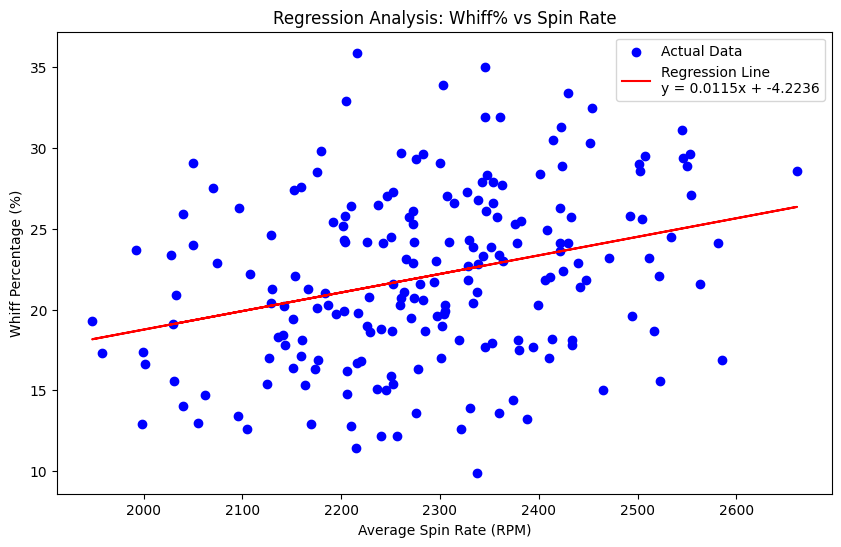

In [282]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label=f'Regression Line\ny = {slope:.4f}x + {intercept:.4f}')
plt.xlabel('Average Spin Rate (RPM)')
plt.ylabel('Whiff Percentage (%)')
plt.title('Regression Analysis: Whiff% vs Spin Rate')
plt.legend()
plt.show()

In [283]:
# This visualisation shows that the relationship between whiff% and avg spin rate is postive, meaning there
# is some corrolation when avg spin rate gopes up then whiff% goes up as well, thus creating some truth to my hypothesis

In [284]:
slope, intercept

(0.011490966678334411, -4.223593745110641)